# Unsupervised Learning - Clustering G09
###
### Assignment Goal: Categorize countries by level of development based on social, economic, health and safety factors

### 
- 18851 Luís Gonçalves Oliveira

### Methodology: The methodology used to develop the project consists of the following steps: exploratory data analysis, data pre-processing and clustering with K-Means. The inertia value of K-Means will be evaluated by PCA(Principal Components Analysis). To determine the ideal number of clusters (K) for K-means we will use the Elbow method.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
dt = pd.read_csv("All Countries and Economies.csv")
dt = dt.loc[:, ~dt.columns.str.contains('^Unnamed')]

dt.head()

,Country,Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),"Life expectancy at birth, total (years)","Population, total",Population growth (annual %),Net migration,Human Capital Index (HCI) (scale 0-1),GDP (current US$)current US$constant US$current LCUconstant LCU,GDP per capita (current US$)current US$constant US$current LCUconstant LCU,GDP growth (annual %),...,Access to electricity (% of population),"Annual freshwater withdrawals, total (% of internal resources)","Electricity production from renewable sources, excluding hydroelectric (% of total)",People using safely managed sanitation services (% of population),"Intentional homicides (per 100,000 people)","Central government debt, total (% of GDP)",Statistical performance indicators (SPI): Overall score (scale 0-100),Individuals using the Internet (% of population),Proportion of seats held by women in national parliaments (%),"Foreign direct investment, net inflows (% of GDP)"
0,afghanistan,NaN,62.0,"41,128,771",2.5,"-183,672",0.4,14.58,363.7,-20.7,...,97.7,43,NaN,NaN,4.0,NaN,49.8,18.0,27.0,0.1
1,albania,0.0,76.0,"2,775,634",-1.3,"-10,612",0.6,18.88,"6,802.80",4.8,...,100.0,3,0.0,48.0,2.0,82.4,75.4,79.0,36.0,7.6
2,algeria,0.5,76.0,"44,903,225",1.6,"-18,797",0.5,191.91,"4,273.90",3.1,...,99.8,87,0.1,18.0,2.0,NaN,55.1,71.0,8.0,0
3,american-samoa,NaN,NaN,"44,273",-1.7,"-1,646",NaN,"709,000,000","15,743.30",-1.9,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,andorra,NaN,NaN,"79,824",1,"1,377",NaN,3.35,"41,992.80",8.8,...,100.0,NaN,NaN,100.0,3.0,NaN,NaN,94.0,46.0,NaN


In [3]:

# Renaming the columns directly
dt.rename(columns={
    'GDP (current US$)current US$constant US$current LCUconstant LCU': 'GDP (current US$)',
    'GDP per capita (current US$)current US$constant US$current LCUconstant LCU': 'GDP per capita (current US$)'
}, inplace=True)

dt.shape


(217, 25)

The Dataset have 217 rows and 25 variables

### Features Description


- **Poverty headcount ratio at $2.15 a day (2017 PPP):** Measures the proportion of the population living below the international poverty line of $2.15 per person per day, adjusted for purchasing power parity (PPP).

- **Life expectancy at birth, total (years):** The average number of years a newborn is expected to live, assuming that current mortality rates remain constant.

- **Population, total:** The total number of individuals living within the borders of a country.

- **Population growth (annual %):** The yearly percentage increase in the population.

- **Net migration:** The net total of migrants during a period, calculated as the total number of immigrants minus the number of emigrants.

- **Human Capital Index (HCI):** An index measuring the potential human capital that a child born today can expect to attain by age 18.

- **GDP (current US$):** The sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products.

- **GDP per capita (current US$):** GDP divided by mid-year population.

- **GDP growth (annual %):** The annual percentage growth rate of GDP at market prices based on constant local currency.

- **Unemployment, total (% of total labor force):** The proportion of the labor force that is without jobs but available for and seeking employment.

- **Inflation, consumer prices (annual %):** The rate of price change in the economy as a whole.

- **Personal remittances, received (% of GDP):** Personal transfers consisting of all current transfers in cash or in kind made or received by resident households.

- **CO2 emissions (metric tons per capita):** Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement.

- **Forest area (% of land area):** The percentage of land area covered by forested land.

- **Access to electricity (% of population):** The percentage of the population with access to electricity.

- **Annual freshwater withdrawals, total (% of internal resources):** The annual total withdrawal of freshwater by all major sectors.

- **Electricity production from renewable sources, excluding hydroelectric (% of total):** The share of electricity produced by renewable sources other than hydroelectric (including, for example, wind, solar, geothermal, and biomass).

- **People using safely managed sanitation services (% of population):** The percentage of people using managed sanitation services that ensure hygienic separation of human excreta from human contact.

- **Intentional homicides (per 100,000 people):** The number of victims of intentional homicides per 100,000 population.

- **Central government debt, total (% of GDP):** The total amount of debt owed by the central government.

- **Statistical performance indicators (SPI): Overall score (scale 0-100):** An indicator of the overall capacity of a country's statistical system.

- **Individuals using the Internet (% of population):** The percentage of individuals using the Internet.

- **Proportion of seats held by women in national parliaments (%):** The percentage of parliamentary seats in a single or lower chamber held by women.

- **Foreign direct investment, net inflows (% of GDP):** The net inflows of investment to acquire a lasting management interest (10 percent or more of voting stock) in an enterprise operating in an economy other than that of the investor.


#### We changed the datatypes of the features because we need to work with discrete and continuous variables

In [4]:
dt['Population, total'] = pd.to_numeric(dt['Population, total'].str.replace(',', ''), errors='coerce')
dt['Population growth (annual %)'] = pd.to_numeric(dt['Population growth (annual %)'], errors='coerce')
dt['Foreign direct investment, net inflows (% of GDP)'] = pd.to_numeric(dt['Foreign direct investment, net inflows (% of GDP)'], errors='coerce')
dt['Human Capital Index (HCI) (scale 0-1)'] = pd.to_numeric(dt['Human Capital Index (HCI) (scale 0-1)'], errors='coerce')
dt['Net migration'] = pd.to_numeric(dt['Net migration'], errors='coerce')
dt['GDP (current US$)'] = pd.to_numeric(dt['GDP (current US$)'].str.replace(r'[^\d.]', '', regex=True), errors='coerce')
dt['GDP per capita (current US$)'] = pd.to_numeric(dt['GDP per capita (current US$)'].str.replace(r'[^\d.]', '', regex=True), errors='coerce')
dt['GDP growth (annual %)'] = pd.to_numeric(dt['GDP growth (annual %)'], errors='coerce')
dt['Annual freshwater withdrawals, total (% of internal resources)'] = pd.to_numeric(dt['Annual freshwater withdrawals, total (% of internal resources)'].str.rstrip('%'), errors='coerce')

dt.dtypes

Country                                                                                 object
Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)                    float64
Life expectancy at birth, total (years)                                                float64
Population, total                                                                      float64
Population growth (annual %)                                                           float64
Net migration                                                                          float64
Human Capital Index (HCI) (scale 0-1)                                                  float64
GDP (current US$)                                                                      float64
GDP per capita (current US$)                                                           float64
GDP growth (annual %)                                                                  float64
Unemployment, total (% of total labor force) (mode

We have examined the dataset for any null values. Features that contained NaN values, which are not relevant to our clustering analysis, have been removed to ensure the integrity of the clustering results.

In [5]:
dt.isnull().sum()

Country                                                                                  0
Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)                     56
Life expectancy at birth, total (years)                                                  5
Population, total                                                                        0
Population growth (annual %)                                                             1
Net migration                                                                          161
Human Capital Index (HCI) (scale 0-1)                                                   44
GDP (current US$)                                                                        3
GDP per capita (current US$)                                                             4
GDP growth (annual %)                                                                    6
Unemployment, total (% of total labor force) (modeled ILO estimate)                     29

In [6]:
dt.duplicated().sum()

0

Dataset has no duplicate values

In [7]:
dt.describe()

,Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),"Life expectancy at birth, total (years)","Population, total",Population growth (annual %),Net migration,Human Capital Index (HCI) (scale 0-1),GDP (current US$),GDP per capita (current US$),GDP growth (annual %),"Unemployment, total (% of total labor force) (modeled ILO estimate)",...,Access to electricity (% of population),"Annual freshwater withdrawals, total (% of internal resources)","Electricity production from renewable sources, excluding hydroelectric (% of total)",People using safely managed sanitation services (% of population),"Intentional homicides (per 100,000 people)","Central government debt, total (% of GDP)",Statistical performance indicators (SPI): Overall score (scale 0-100),Individuals using the Internet (% of population),Proportion of seats held by women in national parliaments (%),"Foreign direct investment, net inflows (% of GDP)"
count,161.000000,212.000000,2.170000e+02,216.000000,56.000000,173.000000,2.140000e+02,213.000000,211.000000,188.000000,...,214.000000,173.000000,142.000000,126.000000,194.000000,97.000000,173.000000,210.000000,194.000000,197.000000
mean,11.518012,71.436321,2.347268e+07,0.878241,-92.028571,0.577457,4.230482e+07,20357.040282,3.437441,7.331383,...,86.658879,43.965318,7.322535,59.277778,6.881443,67.321649,62.992486,67.144762,25.283505,6.181726
std,18.500922,9.062419,4.640524e+07,1.600622,471.036754,0.216501,1.708305e+08,30628.106536,7.338254,5.438074,...,24.306866,122.765512,11.301066,30.150194,10.592859,76.228556,17.684696,26.345892,13.126212,30.954467
min,0.000000,0.500000,1.410000e+00,-14.200000,-995.000000,0.300000,1.000000e+00,4.200000,-29.700000,0.100000,...,1.700000,0.000000,0.000000,6.000000,0.000000,0.000000,19.600000,0.000000,0.000000,-10.600000
25%,0.300000,66.000000,6.951680e+05,0.275000,-392.000000,0.400000,7.280000e+00,2404.300000,1.900000,3.600000,...,86.300000,2.000000,0.000000,31.250000,1.000000,33.200000,52.000000,48.250000,15.250000,1.000000
50%,1.600000,72.000000,6.336392e+06,0.850000,-21.500000,0.600000,2.817000e+01,7297.200000,3.600000,5.600000,...,100.000000,8.000000,1.900000,63.000000,3.000000,55.400000,61.700000,76.000000,25.500000,2.600000
75%,15.600000,77.250000,2.267376e+07,1.725000,216.750000,0.700000,2.202325e+02,27638.400000,5.750000,9.850000,...,100.000000,27.000000,9.100000,85.000000,7.000000,79.300000,78.100000,87.000000,34.000000,4.900000
max,81.500000,85.000000,3.332876e+08,3.700000,831.000000,2.700000,9.835829e+08,234317.100000,57.800000,29.800000,...,100.000000,974.000000,65.400000,100.000000,67.000000,688.000000,90.100000,100.000000,75.000000,429.500000


Data need to be normalized because is not in uniform scale

## Outliers

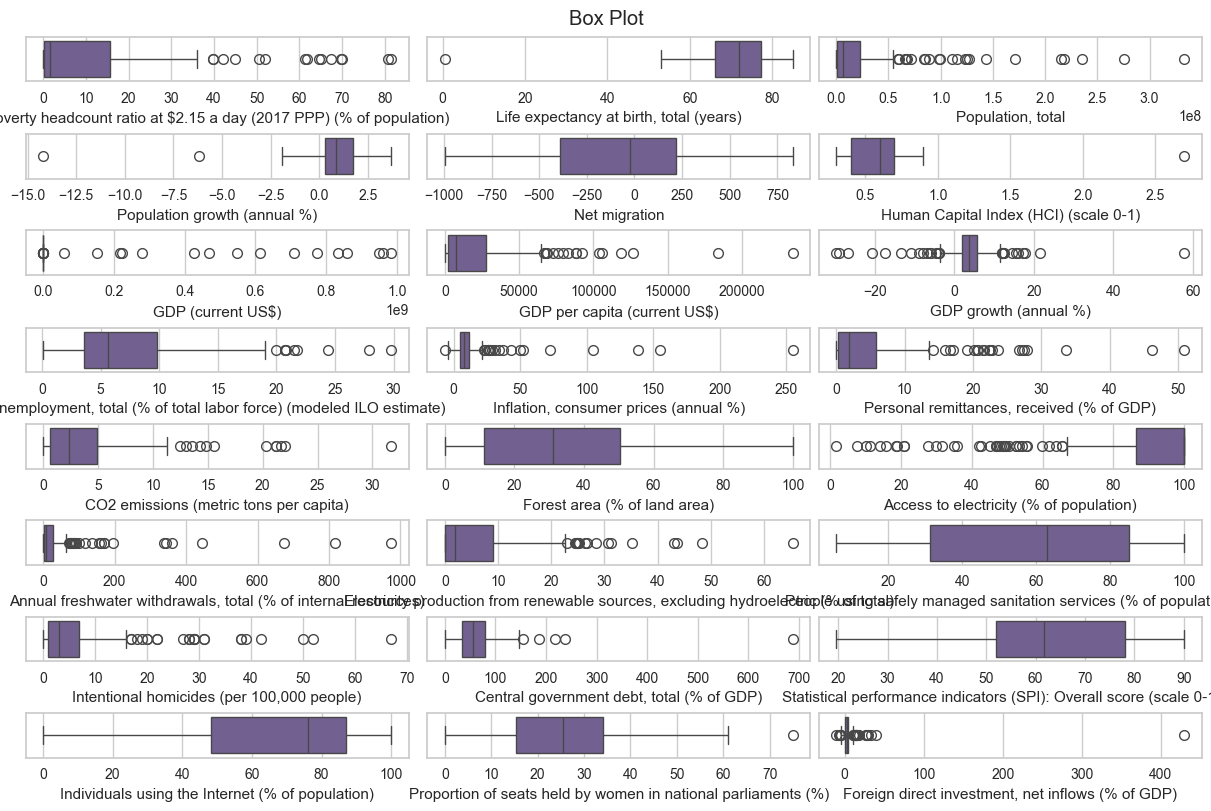

In [8]:
cols = dt.select_dtypes(exclude='object').columns.tolist()

# Calculate the number of rows needed for the subplots based on the number of cols
n_cols = 3
n_rows = -(-len(cols) // n_cols)  # Ceiling division to get enough rows

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8), constrained_layout=True)
ax = ax.flatten()  # This makes it easier to index ax in a loop

plt.suptitle("Box Plot")

for i, col in enumerate(cols):
    sns.boxplot(x=dt[col], ax=ax[i], color="#705898")

    # If there are more subplots than columns, hide the extra axes
    if i >= len(cols) - 1:
        for j in range(i + 1, len(ax)):
            ax[j].set_visible(False)
        break


## Correlation

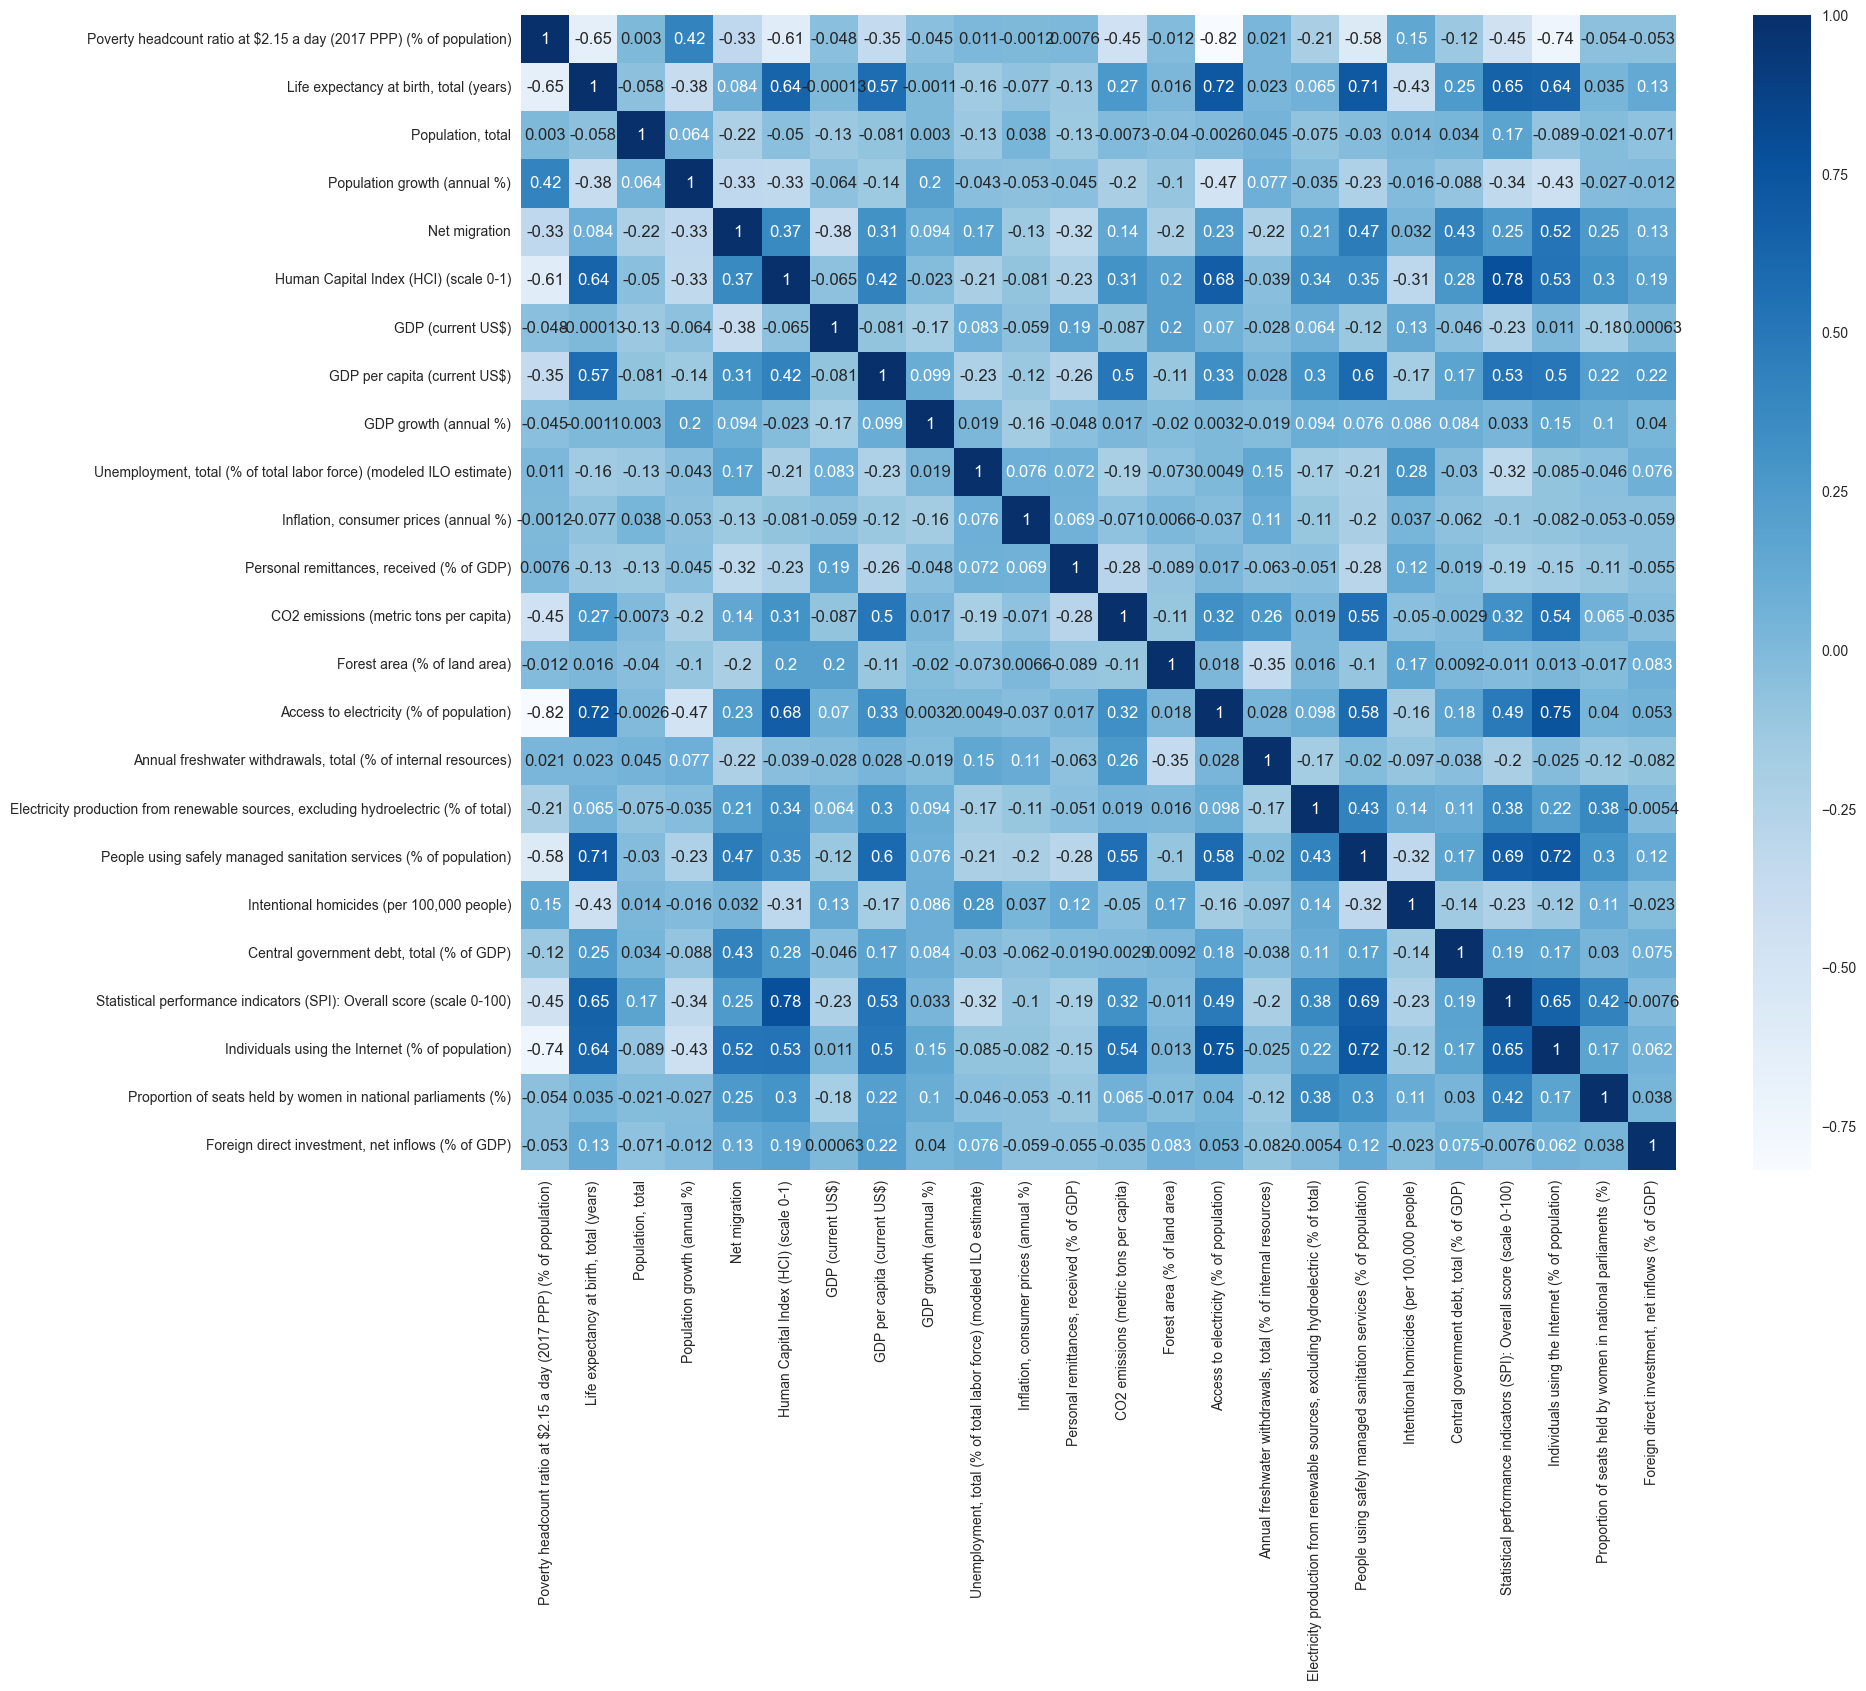

In [9]:
numeric_cols = dt.select_dtypes(include=[np.number]).columns
dt_numeric = dt[numeric_cols]
corr_matrix = dt_numeric.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, square=True, cmap="Blues")
plt.show()

**High Positive Correlation (close to 1):** If two features have a high positive correlation, they provide redundant information. In clustering, this could lead to biased results towards these features. Thus, one of the features may be dropped, or dimensionality reduction techniques such as Principal Component Analysis (PCA) could be used to reduce redundancy.

**High Negative Correlation (close to -1):** This also indicates a strong relationship but in the opposite direction. The same considerations for high positive correlation apply here.

**Low or No Correlation (close to 0):** Features that have low or no correlation with others can be considered independent. In clustering, these features can be useful as they contribute unique information that can help in distinguishing between different clusters.

In the image above, it looks like 'Life expectancy at birth, total (years)' and 'Access to electricity (% of population)' have a relatively high positive correlation (0.72), suggesting that as life expectancy increases, so does access to electricity. This might imply that these two features could potentially be represented by a single feature in clustering.

On the other hand, 'Life expectancy at birth, total (years)' and 'Intentional homicides (per 100,000 people)' have a negative correlation (-0.43), suggesting that places with higher life expectancy have lower rates of intentional homicides.

When applying unsupervised learning techniques like clustering, it is important to consider these correlations. Highly correlated features might lead to certain dimensions dominating the structure of the clusters, which might not be desirable. In contrast, features with low correlation could add unique information that allows the algorithm to distinguish between naturally occurring groups in the data more effectively.

Dimensionality reduction before clustering might help to mitigate issues with correlated features and help to reveal the underlying structure of the data. Techniques such as PCA can be used to transform the features into a set of linearly uncorrelated variables, which might be more appropriate for clustering.


#### In this case instead of removing rows, we filled missing values with the mean of the respective column.

In [10]:

dt = dt.fillna(dt.mean(numeric_only=True))


### Standardize the numerical features in dataset.

In [11]:
X = StandardScaler().fit_transform(dt.drop(columns=["Country"], axis=1).values)
cols = dt.drop(columns=["Country"], axis=1).columns.tolist()

dt_scaled = pd.DataFrame(data = X, columns = cols)
dt_scaled.head()

,Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),"Life expectancy at birth, total (years)","Population, total",Population growth (annual %),Net migration,Human Capital Index (HCI) (scale 0-1),GDP (current US$),GDP per capita (current US$),GDP growth (annual %),"Unemployment, total (% of total labor force) (modeled ILO estimate)",...,Access to electricity (% of population),"Annual freshwater withdrawals, total (% of internal resources)","Electricity production from renewable sources, excluding hydroelectric (% of total)",People using safely managed sanitation services (% of population),"Intentional homicides (per 100,000 people)","Central government debt, total (% of GDP)",Statistical performance indicators (SPI): Overall score (scale 0-100),Individuals using the Internet (% of population),Proportion of seats held by women in national parliaments (%),"Foreign direct investment, net inflows (% of GDP)"
0,-2.236334e-16,-1.055959e+00,0.381356,1.017908,5.992581e-17,-0.920658,-0.249956,-0.660431,-3.343634,8.653822e-01,...,4.584841e-01,-0.008832,0.000000,-3.105095e-16,-0.288435,0.000000,-8.379048e-01,-1.900733,0.138661,-0.206731
1,-7.250268e-01,5.106926e-01,-0.447038,-1.367187,5.992581e-17,0.116957,-0.249956,-0.447731,0.188748,8.851912e-01,...,5.539919e-01,-0.374805,-0.803827,-4.928426e-01,-0.488637,0.297393,7.880483e-01,0.458516,0.865694,0.048210
2,-6.935532e-01,5.106926e-01,0.462881,0.453017,5.992581e-17,-0.401851,-0.249955,-0.531267,-0.046744,8.455731e-01,...,5.456869e-01,0.393738,-0.792849,-1.803853e+00,-0.488637,0.000000,-5.012817e-01,0.149106,-1.396187,-0.210130
3,-2.236334e-16,1.590247e-15,-0.506033,-1.618249,5.992581e-17,0.000000,3.939146,-0.152403,-0.739368,1.759398e-16,...,5.901077e-16,0.000000,0.000000,-3.105095e-16,-0.688839,0.000000,4.512926e-16,0.000000,0.000000,0.000000
4,-2.236334e-16,1.590247e-15,-0.505265,0.076423,5.992581e-17,0.000000,-0.249957,0.714684,0.742847,1.759398e-16,...,5.539919e-01,0.000000,0.000000,1.779575e+00,-0.388536,0.000000,4.512926e-16,1.038659,1.673509,0.000000


## K-Means Clustering

**<font color='#3CB371'>Método Elbow</font>**

The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm. The elbow graph shows the within-cluster-sum-of-square (WCSS) values on the y-axis corresponding to the different values of K (on the x-axis). The optimal K value is the point at which the graph forms an elbow.

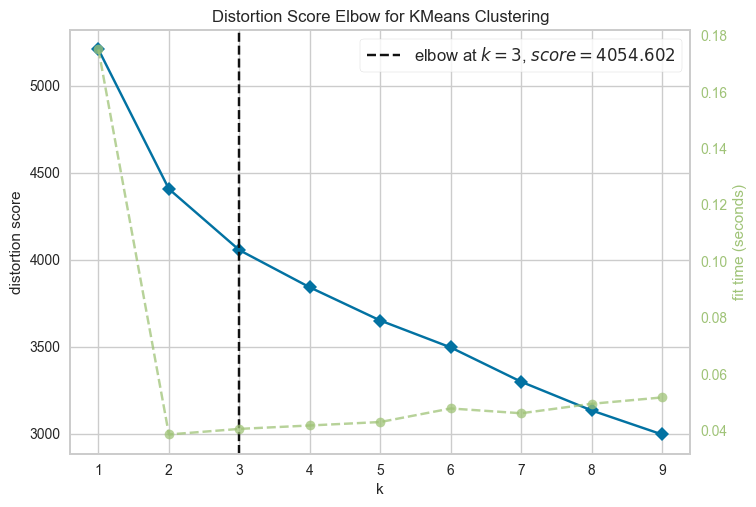

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
visualizer = KElbowVisualizer(KMeans(init="k-means++", random_state=42), k=(1,10))
visualizer.fit(X)        
visualizer.show()  

The Elbow method points out that the optimal value for k in K-means is 3

### K-Means

In [13]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)
k_means = kmeans.fit(X)

print("{} \n{} \n{} \n{}".format(k_means.n_clusters, k_means.cluster_centers_ , k_means.labels_, k_means.inertia_))

3 
[[-0.47538327  0.80533346 -0.03000826 -0.4248055   0.35099272  0.77876827
  -0.24995399  0.92117106 -0.04033725 -0.39491237 -0.13974388 -0.43389408
   0.76659942 -0.15651153  0.54595911  0.03356542  0.37925162  0.95911826
  -0.49898606  0.26173828  0.84337765  0.84275496  0.26343209  0.16384926]
 [ 1.29848449 -1.2003151   0.14810548  0.86950754 -0.16398938 -0.79410543
  -0.24495719 -0.59846273 -0.08947913  0.18117708  0.11408323  0.02496065
  -0.63298071 -0.2710035  -1.54377504  0.2277633  -0.18509811 -0.66997466
   0.15469202 -0.16595191 -0.85700663 -1.41232965 -0.17477114 -0.10885836]
 [-0.32626181  0.03755065 -0.05468758 -0.14163909 -0.16876311 -0.15266502
   0.30664576 -0.35627668  0.07523262  0.19159806  0.04204031  0.30025313
  -0.22693736  0.25263899  0.40176922 -0.14162623 -0.17827534 -0.34679943
   0.28035488 -0.10334107 -0.16686705  0.11983129 -0.10001741 -0.06212918]] 
[1 2 2 2 0 1 2 2 2 0 0 0 2 2 0 2 2 0 0 2 1 0 2 2 2 2 2 2 0 0 1 1 2 2 1 0 0
 1 1 0 0 0 2 1 1 1 2 1 0 2 0 

In [14]:
dt_kmeans = dt.copy()
dt_kmeans["Country"] = dt["Country"]
dt_kmeans["clusters"] = k_means.labels_
dt_kmeans.head()

,Country,Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),"Life expectancy at birth, total (years)","Population, total",Population growth (annual %),Net migration,Human Capital Index (HCI) (scale 0-1),GDP (current US$),GDP per capita (current US$),GDP growth (annual %),...,"Annual freshwater withdrawals, total (% of internal resources)","Electricity production from renewable sources, excluding hydroelectric (% of total)",People using safely managed sanitation services (% of population),"Intentional homicides (per 100,000 people)","Central government debt, total (% of GDP)",Statistical performance indicators (SPI): Overall score (scale 0-100),Individuals using the Internet (% of population),Proportion of seats held by women in national parliaments (%),"Foreign direct investment, net inflows (% of GDP)",clusters
0,afghanistan,11.518012,62.000000,41128771.0,2.5,-92.028571,0.400000,1.458000e+01,363.7,-20.7,...,43.000000,7.322535,59.277778,4.0,67.321649,49.800000,18.000000,27.000000,0.100000,1
1,albania,0.000000,76.000000,2775634.0,-1.3,-92.028571,0.600000,1.888000e+01,6802.8,4.8,...,3.000000,0.000000,48.000000,2.0,82.400000,75.400000,79.000000,36.000000,7.600000,2
2,algeria,0.500000,76.000000,44903225.0,1.6,-92.028571,0.500000,1.919100e+02,4273.9,3.1,...,87.000000,0.100000,18.000000,2.0,67.321649,55.100000,71.000000,8.000000,0.000000,2
3,american-samoa,11.518012,71.436321,44273.0,-1.7,-92.028571,0.577457,7.090000e+08,15743.3,-1.9,...,43.965318,7.322535,59.277778,0.0,67.321649,62.992486,67.144762,25.283505,6.181726,2
4,andorra,11.518012,71.436321,79824.0,1.0,-92.028571,0.577457,3.350000e+00,41992.8,8.8,...,43.965318,7.322535,100.000000,3.0,67.321649,62.992486,94.000000,46.000000,6.181726,0


In [15]:
dt_kmeans["Country"].count()

217

## Split the countries in each cluster

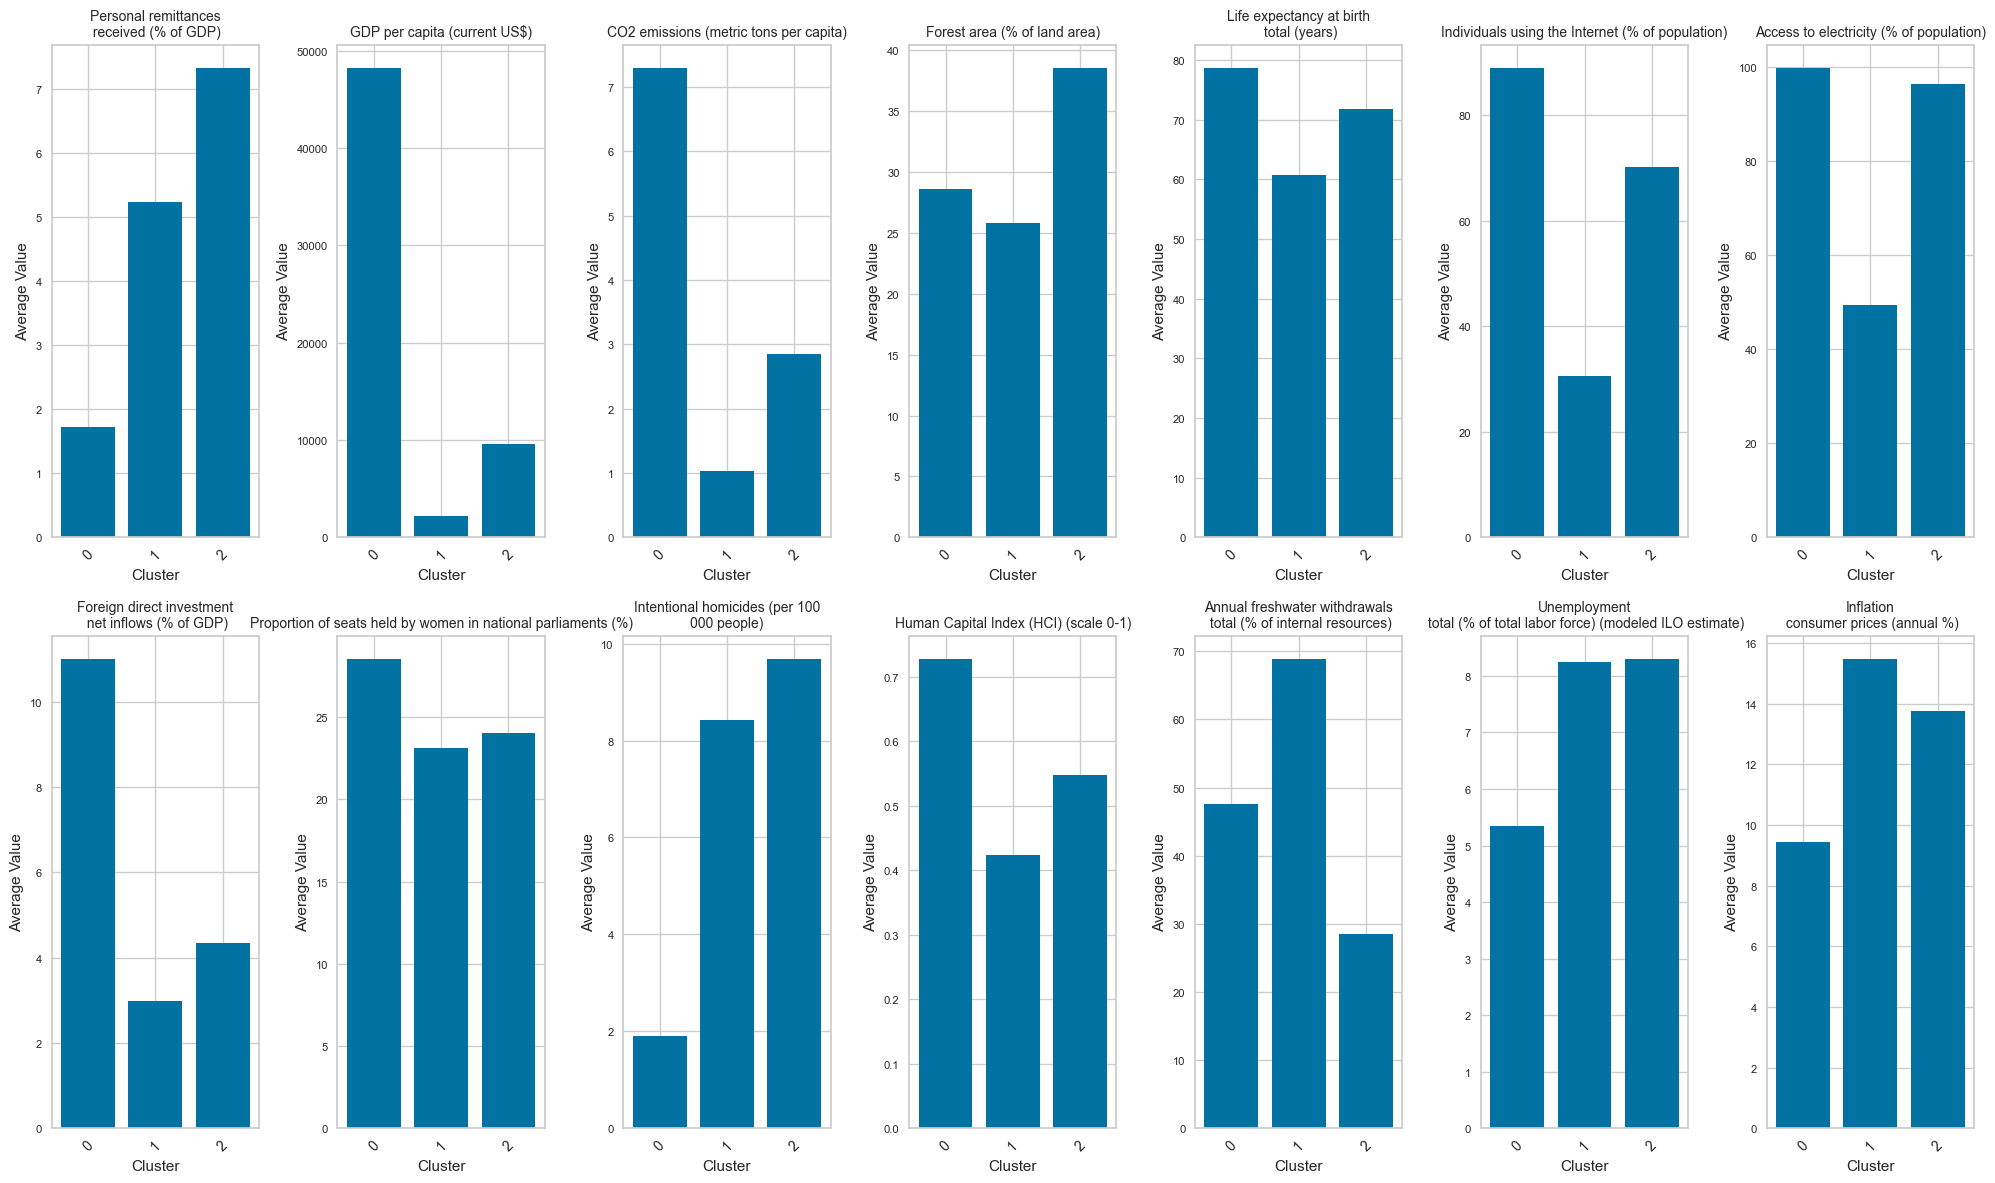

In [16]:
numeric_cols = [
                'Personal remittances, received (% of GDP)',
                'GDP per capita (current US$)',
                'CO2 emissions (metric tons per capita)', 
                'Forest area (% of land area)', 
                'Life expectancy at birth, total (years)',
                'Individuals using the Internet (% of population)',
                'Access to electricity (% of population)', 
                'Foreign direct investment, net inflows (% of GDP)',
                'Proportion of seats held by women in national parliaments (%)',
                'Intentional homicides (per 100,000 people)',
                'Human Capital Index (HCI) (scale 0-1)',
                'Annual freshwater withdrawals, total (% of internal resources)',
                'Unemployment, total (% of total labor force) (modeled ILO estimate)',
                'Inflation, consumer prices (annual %)', 
                ]

# Ensure the 'clusters' column is not in numeric_cols list
if 'clusters' in numeric_cols:
    numeric_cols.remove('clusters')

# Now we can create the plots
fig, axs = plt.subplots(nrows=2, ncols=int(len(numeric_cols)/2), figsize=(20, 12), constrained_layout=True)

# Flatten the axes array for easy indexing
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    # Group by 'clusters' and calculate the mean
    group_means = dt_kmeans.groupby('clusters')[col].mean()
    axs[i].bar(group_means.index.astype(str), group_means.values)
    axs[i].set_title("\n".join(col.split(',')), fontsize=10)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].tick_params(axis='y', labelsize=8)
    axs[i].set_xlabel('Cluster')
    axs[i].set_ylabel('Average Value')

# Adjust the layout so everything fits without overlapping
plt.tight_layout()



plt.show()

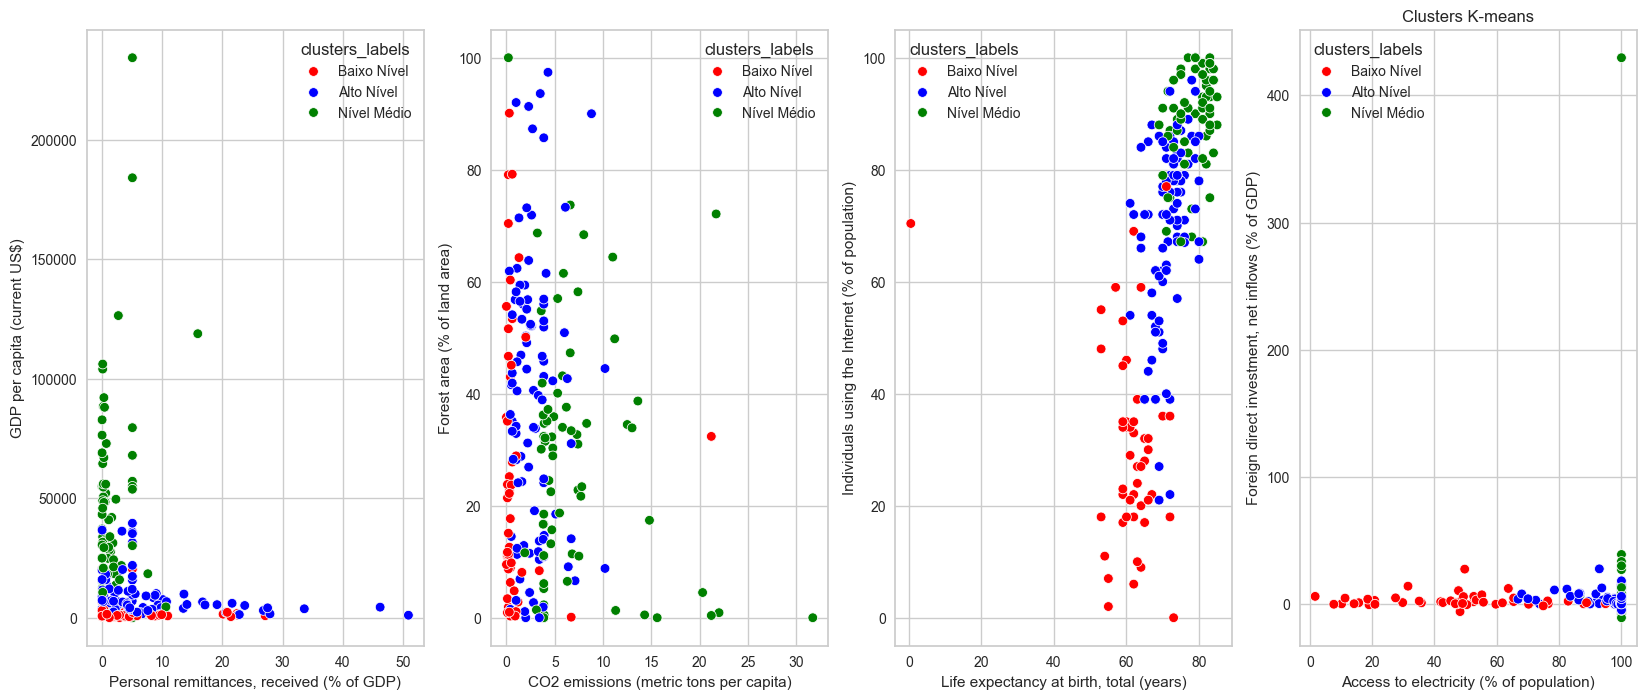

In [17]:
dt_kmeans["clusters_labels"] = dt_kmeans["clusters"].map({0: "Nível Médio", 1: 'Baixo Nível', 2: 'Alto Nível'})
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(20,8))
sns.scatterplot(data=dt_kmeans, x='Personal remittances, received (% of GDP)', y='GDP per capita (current US$)', hue="clusters_labels", ax=ax[0], palette=["red", "blue", "green"])
sns.scatterplot(data=dt_kmeans, x='CO2 emissions (metric tons per capita)', y='Forest area (% of land area)', hue="clusters_labels", ax=ax[1], palette=["red", "blue", "green"])
sns.scatterplot(data=dt_kmeans, x='Life expectancy at birth, total (years)', y='Individuals using the Internet (% of population)', hue="clusters_labels", ax=ax[2], palette=["red", "blue", "green"])
sns.scatterplot(data=dt_kmeans, x='Access to electricity (% of population)', y='Foreign direct investment, net inflows (% of GDP)', hue="clusters_labels", ax=ax[3], palette=["red", "blue", "green"])
plt.title("Clusters K-means")
plt.show()

In [18]:
pca = PCA().fit(X)
pca.n_components_, pca.explained_variance_ratio_

(24,
 array([0.21782848, 0.08019849, 0.07116647, 0.06015805, 0.05458779,
        0.05204547, 0.04854204, 0.04602301, 0.04038928, 0.03812388,
        0.03729838, 0.03395755, 0.03120428, 0.02873273, 0.02538781,
        0.02262887, 0.02084303, 0.01937563, 0.01804851, 0.01561034,
        0.01390533, 0.01143281, 0.00723063, 0.00528113]))



**Variance informs us of how much information each of the principal components accounts for.**

**By using the attribute explained_variance_ratio_, it can be observed. Collectively, these 13 components contain 81,5% of the information**

**A general rule of thumb is to retain approximately 80% of the variance. Thus, in this case, we decide to keep 13 components.**

## Variance

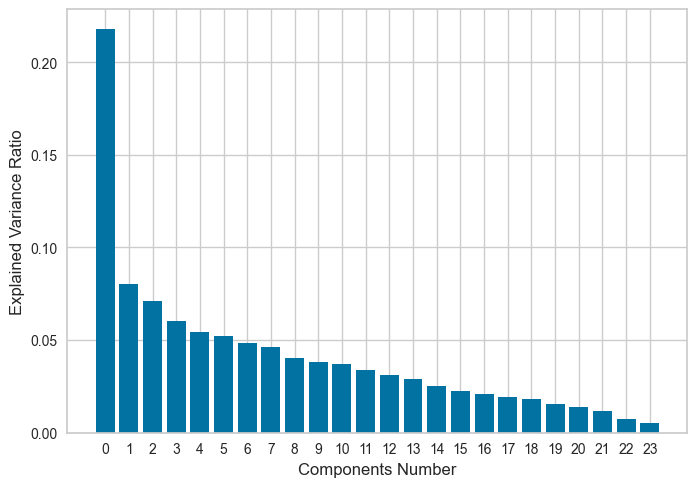

In [19]:
features = range(pca.n_components_) 
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel('Components Number',fontsize=12)
plt.ylabel('Explained Variance Ratio',fontsize=12)
plt.show()

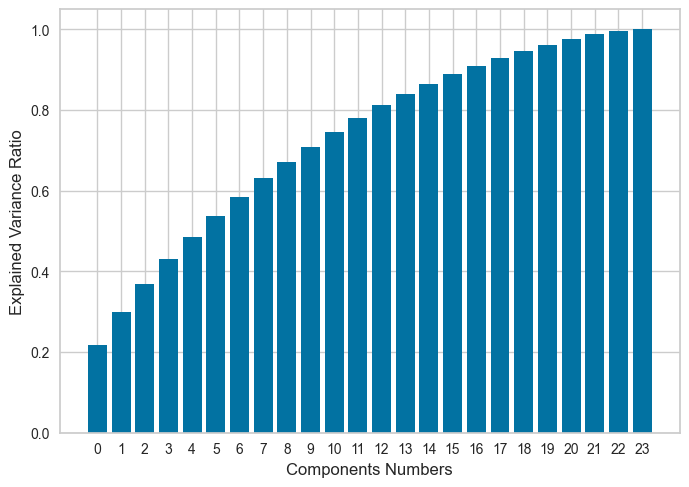

In [20]:
features = range(pca.n_components_) 
plt.bar(features, pca.explained_variance_ratio_.cumsum())
plt.xticks(features)
plt.xlabel('Components Numbers',fontsize=12)
plt.ylabel('Explained Variance Ratio',fontsize=12)
plt.show()


In [21]:
mainComponents = pca.fit_transform(X) 

dt_p = pd.DataFrame(mainComponents)
dt_p = pd.concat([dt_p, dt[["Country"]]], axis=1)
dt_p.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Country
0,2.092777,0.182636,0.734554,-0.154163,0.896925,-0.446912,0.365233,-1.864501,0.199359,-0.485256,...,-0.782524,-1.615450,-0.569942,-0.338300,0.074703,-0.501112,0.081557,-0.005661,0.992064,afghanistan
1,-0.914117,1.005985,-0.384066,0.744563,0.716812,0.529621,0.979732,0.345962,-0.274384,-0.048283,...,0.467217,0.410429,0.143129,0.009545,0.153585,-0.090830,-0.242454,0.180901,-0.117241,albania
2,0.677818,1.058098,1.924587,0.163467,0.407762,0.300203,0.410035,1.078278,-0.361238,-0.163061,...,0.753954,-1.037073,0.878471,-0.269582,0.530694,0.372061,-0.094399,0.283946,-0.124687,algeria
3,-0.209593,2.641506,-1.778451,-1.135101,-0.879818,0.216257,-1.398629,-0.959678,0.809763,-0.662929,...,1.447322,1.264793,-1.280516,0.382266,0.448850,0.618764,-0.290981,0.478081,0.088629,american-samoa
4,-1.720867,-1.081971,-0.057817,0.507353,-0.855905,-0.279119,0.011685,-0.122630,0.262947,0.164894,...,-0.083847,0.332281,-0.994777,0.129293,-0.080232,-0.334569,0.486639,-0.850264,0.147397,andorra


### PCA with a chosen number of components

In [22]:
pca = PCA(n_components=13)
mainComponents = pca.fit_transform(X) 
dt_pca = pd.DataFrame(mainComponents, columns=['Component_1', 'Component_2', 'Component_3', 'Component_4','Component_5','Component_6','Component_7','Component_8','Component_9','Component_10','Component_11','Component_12','Component_13',])
dt_pca.head()

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11,Component_12,Component_13
0,2.092777,0.182636,0.734554,-0.154163,0.896925,-0.446912,0.365233,-1.864501,0.199359,-0.485256,2.049316,-1.725510,-0.263735
1,-0.914117,1.005985,-0.384066,0.744563,0.716812,0.529621,0.979732,0.345962,-0.274384,-0.048283,-0.045438,-0.905263,0.509287
2,0.677818,1.058098,1.924587,0.163467,0.407762,0.300203,0.410035,1.078278,-0.361238,-0.163061,0.252704,-0.655789,0.050984
3,-0.209593,2.641506,-1.778451,-1.135101,-0.879818,0.216257,-1.398629,-0.959678,0.809763,-0.662929,0.399927,-0.177991,-0.220686
4,-1.720867,-1.081971,-0.057817,0.507353,-0.855905,-0.279119,0.011685,-0.122630,0.262947,0.164894,-0.592063,-0.446151,-0.551664


**<font color='#3CB371'>Elbow Method</font>**

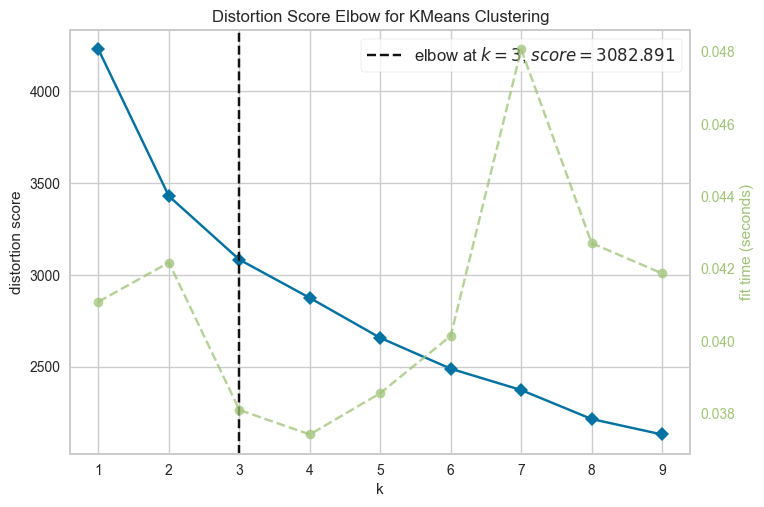

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
visualizer = KElbowVisualizer(KMeans(init="k-means++", random_state=42), k=(1, 10))
visualizer.fit(dt_pca.iloc[:,:13])        
visualizer.show()  

**<font color='#3CB371'>Silhouette Method</font>**

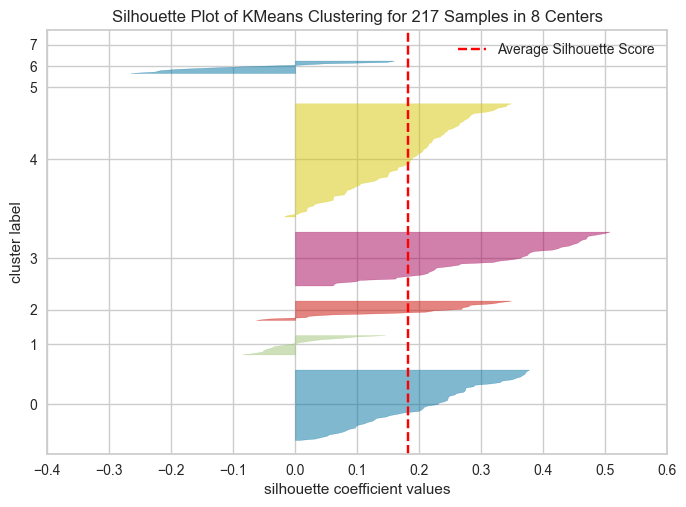

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 217 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [24]:
visualizer = SilhouetteVisualizer(KMeans(init="k-means++", random_state=42), colors='yellowbrick')
visualizer.fit(dt_pca.iloc[:,:13])        
visualizer.show() 


## Silhouette Plot Analysis

The Silhouette Plot shown in the graph is utilized for evaluating the consistency within clusters of the KMeans clustering algorithm. It visually represents how close each point in one cluster is to points in the neighboring clusters. This plot is particularly useful for determining the appropriateness of the number of clusters by assessing the silhouette scores.

### Observations

- **Silhouette Coefficient**: The length of each silhouette indicates how well each sample lies within its cluster, with a value close to +1 suggesting the sample is well matched to its own cluster and poorly matched to neighboring clusters.
- **Average Silhouette Score**: The red dashed line represents the average silhouette score across all samples, providing a baseline for comparison.
- **Cluster Density**: Some clusters have denser silhouettes, suggesting that the samples within those clusters are more similar to each other than to samples in other clusters.
- **Negative Scores**: The presence of silhouette scores below the average, including some negative scores, suggests that some samples might be better situated in different clusters or that the number of clusters may need adjustment.

### Recommendation Based on the Plot

While the plot was initially analyzed for 8 clusters, there is an indication of three denser and more distinct groupings of silhouette coefficients. This suggests that a clustering solution with fewer clusters, possibly 3, could be more appropriate. These three clusters could potentially encapsulate the major underlying patterns in the data while simplifying the model and improving interpretability.



In [25]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)
kmeans_pca = kmeans.fit(dt_pca.iloc[:,:4])

print("{} \n{} \n{} \n{}".format(kmeans_pca.n_clusters, kmeans_pca.cluster_centers_ , kmeans_pca.labels_, kmeans_pca.inertia_))


3 
[[ 3.02061339 -0.84418229  0.35146778 -0.10165866]
 [-2.47397343 -0.53503563  0.27106717 -0.19604987]
 [ 0.10459755  0.92766544 -0.42391755  0.21440404]] 
[0 2 2 2 1 0 2 1 2 1 1 1 2 2 1 0 1 1 1 2 0 1 2 2 2 2 2 2 1 1 0 0 2 2 0 1 1
 0 0 1 1 1 2 0 0 0 2 0 1 2 1 1 1 1 0 2 2 2 2 2 2 0 1 0 0 1 2 1 1 2 2 0 2 1
 0 2 1 1 2 2 2 0 0 2 0 2 1 1 1 2 2 2 0 1 1 1 1 2 1 2 1 0 2 0 1 2 1 2 2 1 2
 0 0 0 1 1 1 1 0 0 1 2 0 1 2 0 2 2 2 2 1 2 2 2 0 2 0 2 2 1 2 1 2 0 0 2 2 1
 1 0 2 2 0 2 2 2 1 1 2 1 1 1 0 2 1 2 1 0 2 2 0 1 2 1 1 0 0 2 0 1 2 2 2 2 2
 0 2 1 1 0 2 0 2 2 0 2 2 2 1 0 1 2 0 2 1 1 1 1 0 2 2 2 2 0 0 0 0] 
1125.0063978435658


In [26]:
df_pca_kmeans = dt.copy()
df_pca_kmeans["Country"] = dt["Country"]
df_pca_kmeans["clusters_pca"] = kmeans_pca.labels_
df_pca_kmeans.head()

,Country,Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),"Life expectancy at birth, total (years)","Population, total",Population growth (annual %),Net migration,Human Capital Index (HCI) (scale 0-1),GDP (current US$),GDP per capita (current US$),GDP growth (annual %),...,"Annual freshwater withdrawals, total (% of internal resources)","Electricity production from renewable sources, excluding hydroelectric (% of total)",People using safely managed sanitation services (% of population),"Intentional homicides (per 100,000 people)","Central government debt, total (% of GDP)",Statistical performance indicators (SPI): Overall score (scale 0-100),Individuals using the Internet (% of population),Proportion of seats held by women in national parliaments (%),"Foreign direct investment, net inflows (% of GDP)",clusters_pca
0,afghanistan,11.518012,62.000000,41128771.0,2.5,-92.028571,0.400000,1.458000e+01,363.7,-20.7,...,43.000000,7.322535,59.277778,4.0,67.321649,49.800000,18.000000,27.000000,0.100000,0
1,albania,0.000000,76.000000,2775634.0,-1.3,-92.028571,0.600000,1.888000e+01,6802.8,4.8,...,3.000000,0.000000,48.000000,2.0,82.400000,75.400000,79.000000,36.000000,7.600000,2
2,algeria,0.500000,76.000000,44903225.0,1.6,-92.028571,0.500000,1.919100e+02,4273.9,3.1,...,87.000000,0.100000,18.000000,2.0,67.321649,55.100000,71.000000,8.000000,0.000000,2
3,american-samoa,11.518012,71.436321,44273.0,-1.7,-92.028571,0.577457,7.090000e+08,15743.3,-1.9,...,43.965318,7.322535,59.277778,0.0,67.321649,62.992486,67.144762,25.283505,6.181726,2
4,andorra,11.518012,71.436321,79824.0,1.0,-92.028571,0.577457,3.350000e+00,41992.8,8.8,...,43.965318,7.322535,100.000000,3.0,67.321649,62.992486,94.000000,46.000000,6.181726,1


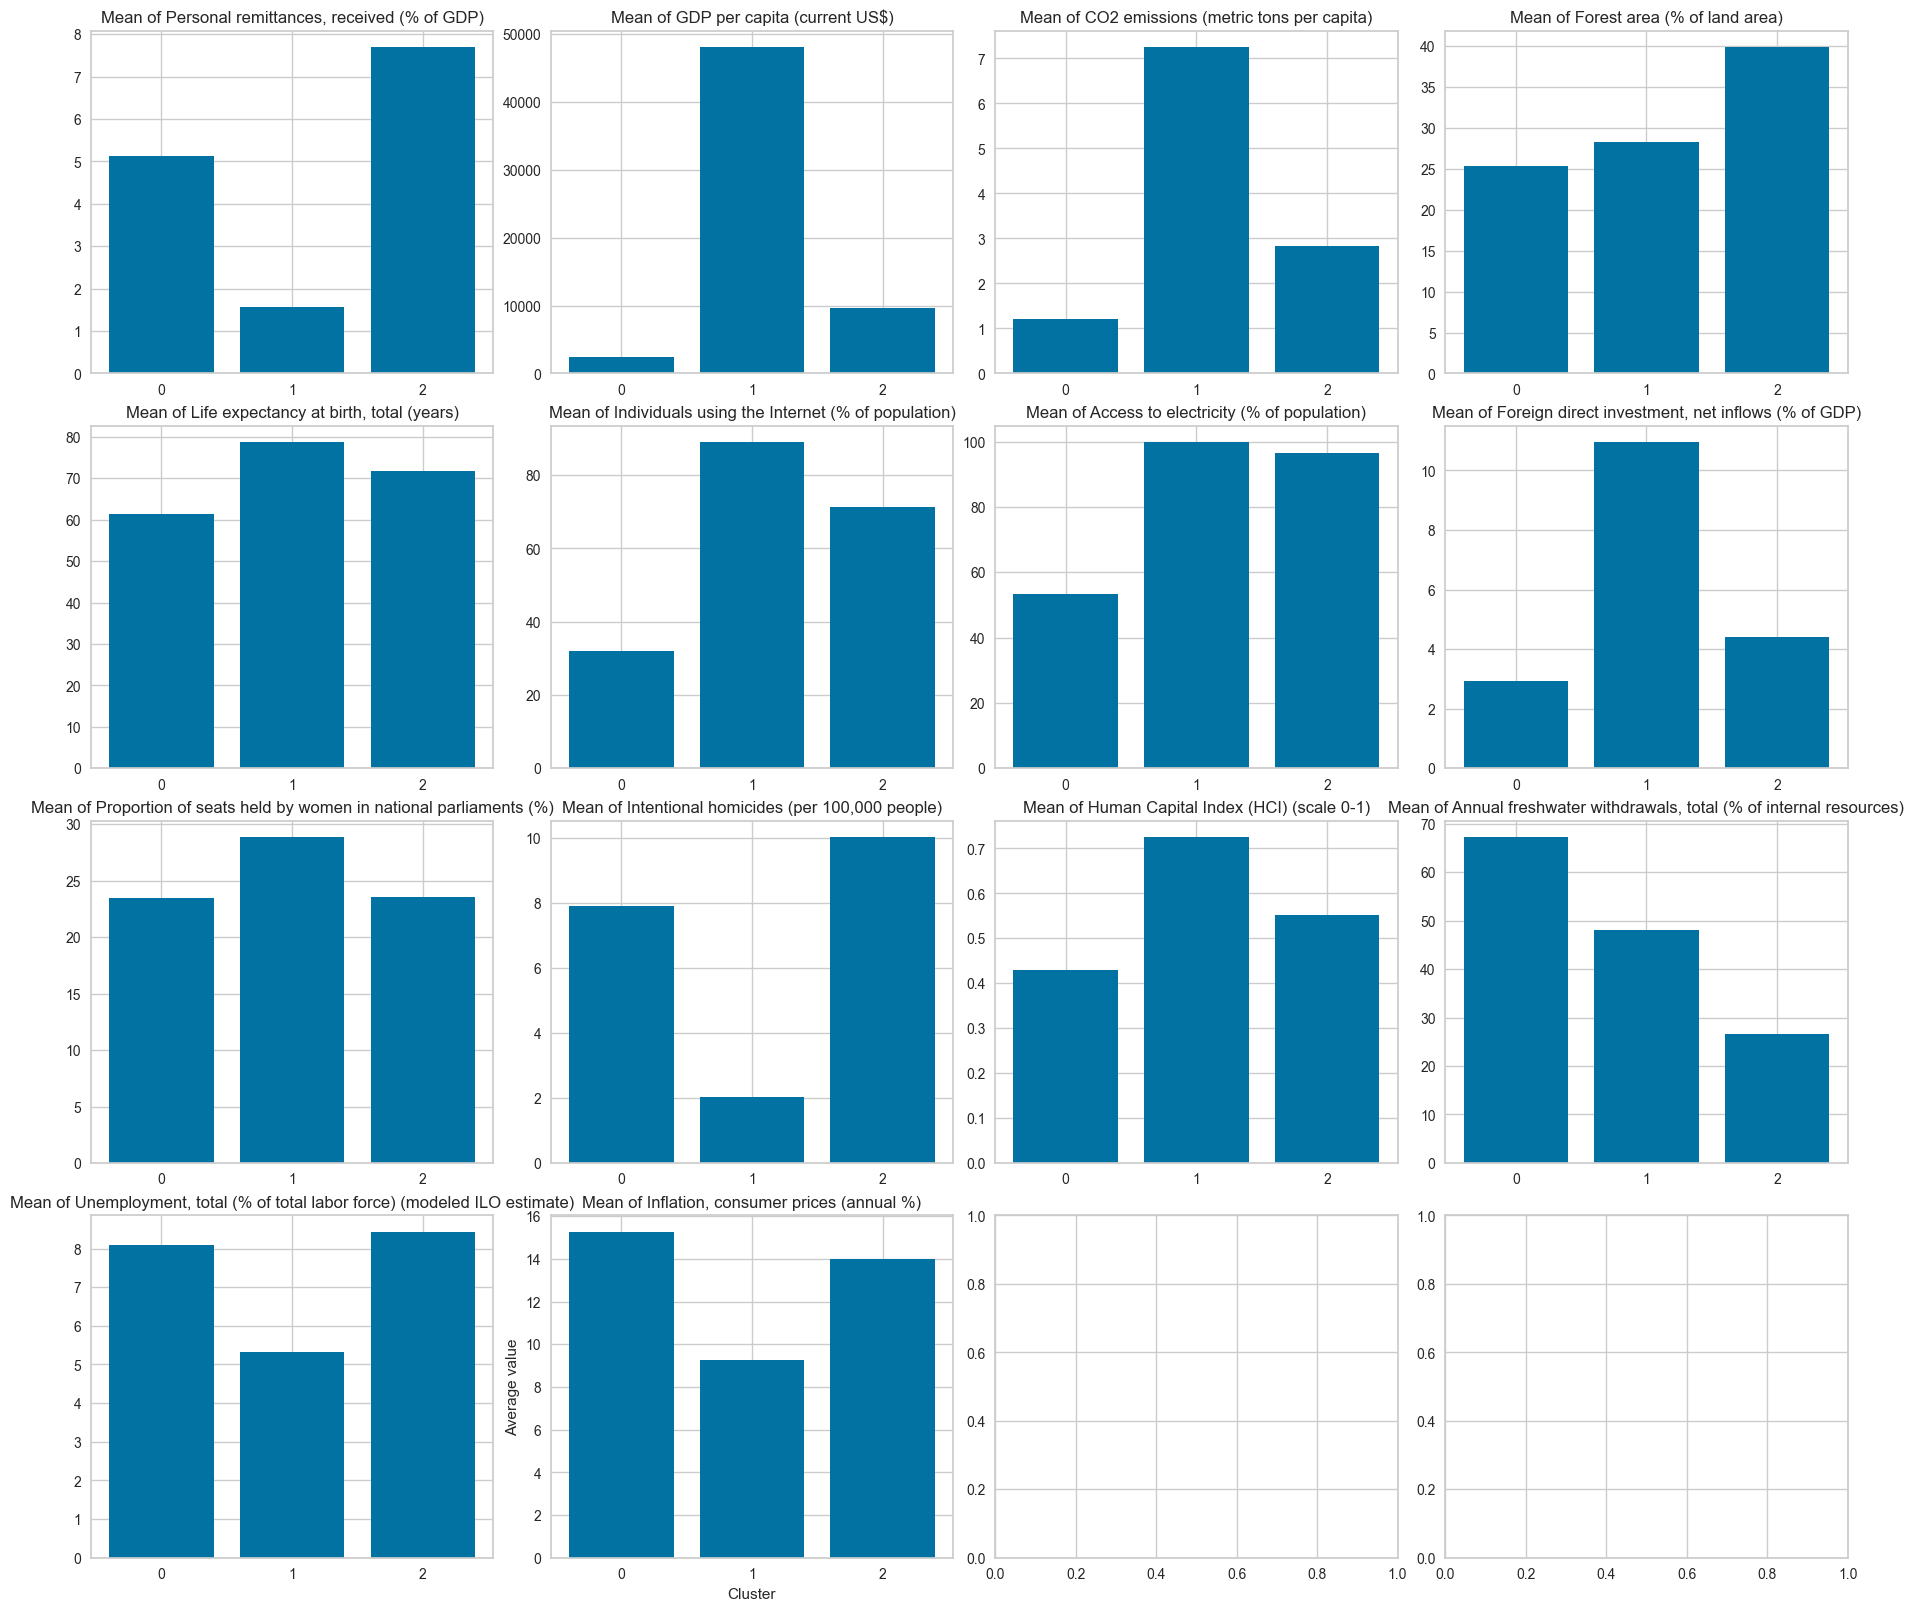

In [27]:
numeric_cols = [
                'Personal remittances, received (% of GDP)',
                'GDP per capita (current US$)',
                'CO2 emissions (metric tons per capita)', 
                'Forest area (% of land area)', 
                'Life expectancy at birth, total (years)',
                'Individuals using the Internet (% of population)',
                'Access to electricity (% of population)', 
                'Foreign direct investment, net inflows (% of GDP)',
                'Proportion of seats held by women in national parliaments (%)',
                'Intentional homicides (per 100,000 people)',
                'Human Capital Index (HCI) (scale 0-1)',
                'Annual freshwater withdrawals, total (% of internal resources)',
                'Unemployment, total (% of total labor force) (modeled ILO estimate)',
                'Inflation, consumer prices (annual %)', 
                ]

# Ensure the 'clusters' column is not in numeric_cols list
if 'clusters' in numeric_cols:
    numeric_cols.remove('clusters')

num_rows = int(np.ceil(len(numeric_cols) / 4))
num_cols = min(len(numeric_cols), 4)  

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, num_rows * 4), constrained_layout=True)

# Flatten the axes array for easy indexing
axs = axs.flatten()

# Loop through the numeric columns and create a bar plot for each
for i, col in enumerate(numeric_cols):
    # Group by 'clusters' and calculate the mean
    group_means = df_pca_kmeans.groupby('clusters_pca')[col].mean()
    axs[i].bar(group_means.index.astype(str), group_means.values)
    axs[i].set_title(f'Mean of {col}')
axs[i].set_xlabel('Cluster')
axs[i].set_ylabel('Average value')


plt.show()

In [28]:
df_pca_kmeans["clusters_labels"] = df_pca_kmeans["clusters_pca"].map({0: "Nível C", 1:"Nível A", 2:"Nível B"}) 

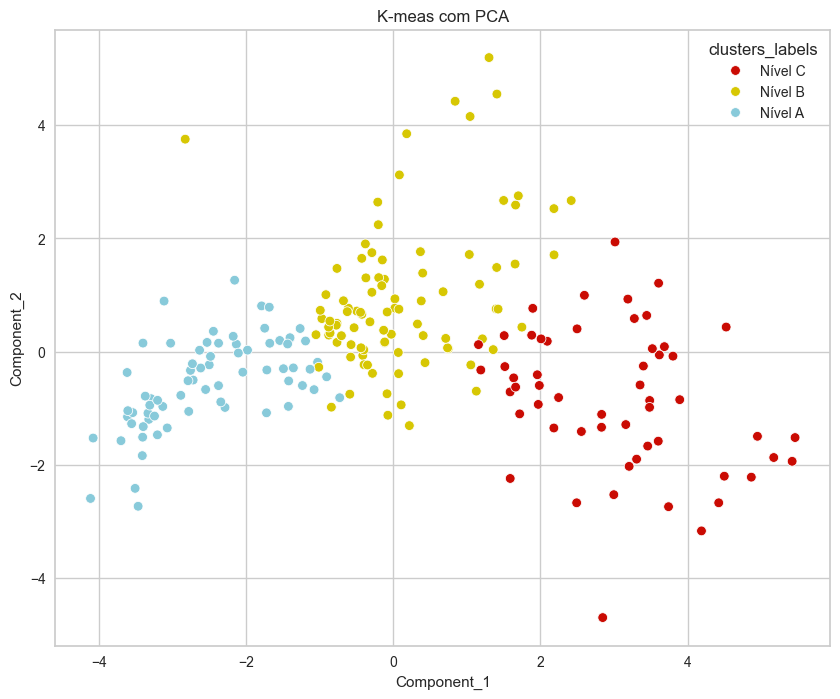

In [29]:
x_axis = dt_pca["Component_1"]
y_axis = dt_pca["Component_2"]
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis, y= y_axis, hue=df_pca_kmeans["clusters_labels"] , palette=['r', 'y', 'c', 'g'])
plt.title("K-meas com PCA")
plt.show()

## Final Map

In [30]:

fig = px.choropleth(data_frame=df_pca_kmeans, locationmode= 'country names', locations='Country', color=df_pca_kmeans['clusters_labels'], title='Countries by level of development')
fig.show()

## Conclusion

### It is evident that the approach of retaining all features, employing the mean to fill in null values, and enhancing this with PCA leads to improved outcomes.
